In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [174]:
# Function to split the ProductList in to multiple rows for the individual order (Products)
def splitDataFrameList(df,target_column,separator):
    ''' df = dataframe to split,
    target_column = the column containing the values to split
    separator = the symbol used to perform the split
    returns: a dataframe with each entry for the target column separated, with each element moved into a new row. 
    The values in the other columns are duplicated across the newly divided rows.
    '''
    def splitListToRows(row,row_accumulator,target_column,separator):
        split_row = row[target_column].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)
    new_rows = []
    df.apply(splitListToRows,axis=1,args = (new_rows,target_column,separator))
    new_df = pd.DataFrame(new_rows)
    return new_df

In [175]:
df1 =  pd.read_csv("C:/Users/Ramnithin\Downloads/analytics vidhya contest/train.csv")
df2 =  pd.read_csv("C:/Users/Ramnithin\Downloads/analytics vidhya contest/test.csv")
df1.head()

,session_id,startTime,endTime,ProductList,gender
0,u16159,15/12/14 18:11,15/12/14 18:12,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female
1,u10253,16/12/14 14:35,16/12/14 14:41,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male
2,u19037,01/12/14 15:58,01/12/14 15:58,A00002/B00001/C00020/D16944/,female
3,u14556,23/11/14 2:57,23/11/14 3:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female
4,u24295,17/12/14 16:44,17/12/14 16:46,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male


In [176]:
df1.shape

(10500, 5)

In [177]:
df2.shape

(4500, 4)

In [178]:
df1 = splitDataFrameList(df1, target_column='ProductList',separator = ';')
df2 = splitDataFrameList(df2, target_column='ProductList',separator = ';')
df1.head()

,session_id,startTime,endTime,ProductList,gender
0,u16159,15/12/14 18:11,15/12/14 18:12,A00002/B00003/C00006/D28435/,female
1,u16159,15/12/14 18:11,15/12/14 18:12,A00002/B00003/C00006/D02554/,female
2,u16159,15/12/14 18:11,15/12/14 18:12,A00002/B00003/C00006/D28436/,female
3,u16159,15/12/14 18:11,15/12/14 18:12,A00002/B00003/C00006/D28437/,female
4,u10253,16/12/14 14:35,16/12/14 14:41,A00001/B00009/C00031/D29404/,male


In [179]:
# Splitting the ProductList column in to Category, Sub category, sub_sub_category and product values
df1[['category','sub_cat','sub_sub_cat','Product','']] = df1.ProductList.str.split("/",expand=True) 
df2[['category','sub_cat','sub_sub_cat','Product','']] = df2.ProductList.str.split("/",expand=True)
df1.head()

,session_id,startTime,endTime,ProductList,gender,category,sub_cat,sub_sub_cat,Product,
0,u16159,15/12/14 18:11,15/12/14 18:12,A00002/B00003/C00006/D28435/,female,A00002,B00003,C00006,D28435,
1,u16159,15/12/14 18:11,15/12/14 18:12,A00002/B00003/C00006/D02554/,female,A00002,B00003,C00006,D02554,
2,u16159,15/12/14 18:11,15/12/14 18:12,A00002/B00003/C00006/D28436/,female,A00002,B00003,C00006,D28436,
3,u16159,15/12/14 18:11,15/12/14 18:12,A00002/B00003/C00006/D28437/,female,A00002,B00003,C00006,D28437,
4,u10253,16/12/14 14:35,16/12/14 14:41,A00001/B00009/C00031/D29404/,male,A00001,B00009,C00031,D29404,


In [180]:
df1.shape

(23251, 10)

In [181]:
df1 = df1.drop(['ProductList'], axis = 1) 
df2 = df2.drop(['ProductList'], axis = 1) 
df1.head()

,session_id,startTime,endTime,gender,category,sub_cat,sub_sub_cat,Product,
0,u16159,15/12/14 18:11,15/12/14 18:12,female,A00002,B00003,C00006,D28435,
1,u16159,15/12/14 18:11,15/12/14 18:12,female,A00002,B00003,C00006,D02554,
2,u16159,15/12/14 18:11,15/12/14 18:12,female,A00002,B00003,C00006,D28436,
3,u16159,15/12/14 18:11,15/12/14 18:12,female,A00002,B00003,C00006,D28437,
4,u10253,16/12/14 14:35,16/12/14 14:41,male,A00001,B00009,C00031,D29404,


In [182]:
df1.describe()

,session_id,startTime,endTime,gender,category,sub_cat,sub_sub_cat,Product,
count,23251,23251,23251,23251,23251,23251,23251,23251,23251
unique,10500,8815,8803,2,11,85,360,16503,1
top,u17936,06/12/14 15:28,06/12/14 15:56,female,A00002,B00002,C00007,D00266,
freq,36,36,40,18410,14931,5583,2077,55,23251


In [183]:
groupdf = df1.groupby('category')

In [184]:
df1.groupby('category')['gender'].value_counts()

category  gender
A00001    male       2666
          female      634
A00002    female    13494
          male       1437
A00003    female     3507
          male        315
A00004    male        175
          female       86
A00005    female      329
          male         84
A00006    female      147
          male         35
A00007    female       33
          male         19
A00008    male         22
          female       16
A00009    female       31
          male         16
A00010    male         41
          female       34
A00011    female       99
          male         31
Name: gender, dtype: int64

In [185]:
df1.groupby('sub_cat')['sub_sub_cat'].value_counts()

sub_cat  sub_sub_cat
B00001   C00010         613
         C00059         460
         C00019         353
         C00053         273
         C00020         216
                       ... 
B00083   C00390           1
B00085   C00403           1
B00089   C00423           1
B00090   C00429           3
B00091   C00436           1
Name: sub_sub_cat, Length: 438, dtype: int64

In [186]:
df1.dtypes

session_id     object
startTime      object
endTime        object
gender         object
category       object
sub_cat        object
sub_sub_cat    object
Product        object
               object
dtype: object

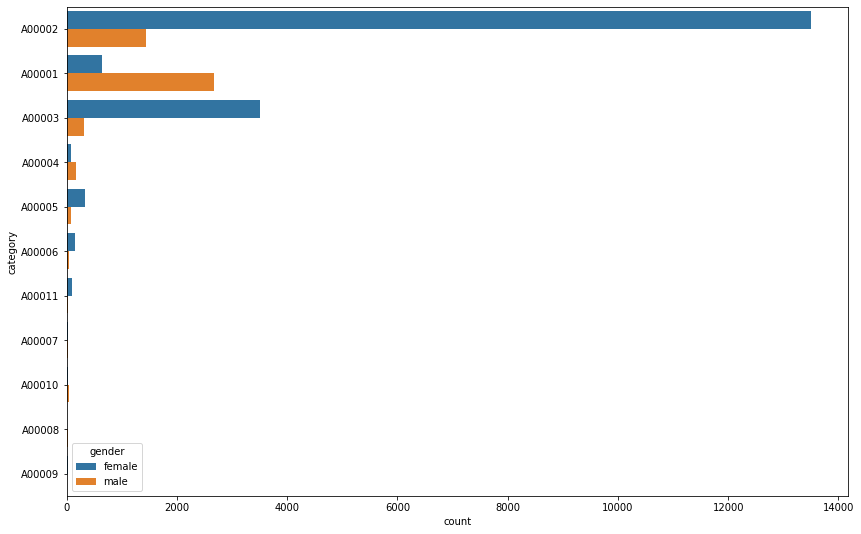

In [187]:
plt.figure(figsize = (14,9))
sns.countplot(data = df1, y = "category", hue = "gender")

In [188]:
df1.gender.value_counts()

female    18410
male       4841
Name: gender, dtype: int64

In [189]:
# converting the training catergorical values to numerical values using LabelEncoder
from sklearn.preprocessing import LabelEncoder
lb_df = LabelEncoder()
df1["cat_code"] = lb_df.fit_transform(df1["category"])
df1["sub_code"] = lb_df.fit_transform(df1["sub_cat"])
df1["sub_sub_code"] = lb_df.fit_transform(df1["sub_sub_cat"])
df1["product_code"] = lb_df.fit_transform(df1["Product"])
df1["gender"] = lb_df.fit_transform(df1["gender"])
df1.head(10)

,session_id,startTime,endTime,gender,category,sub_cat,sub_sub_cat,Product,,cat_code,sub_code,sub_sub_code,product_code
0,u16159,15/12/14 18:11,15/12/14 18:12,0,A00002,B00003,C00006,D28435,,1,2,5,13325
1,u16159,15/12/14 18:11,15/12/14 18:12,0,A00002,B00003,C00006,D02554,,1,2,5,1478
2,u16159,15/12/14 18:11,15/12/14 18:12,0,A00002,B00003,C00006,D28436,,1,2,5,13326
3,u16159,15/12/14 18:11,15/12/14 18:12,0,A00002,B00003,C00006,D28437,,1,2,5,13327
4,u10253,16/12/14 14:35,16/12/14 14:41,1,A00001,B00009,C00031,D29404,,0,8,30,13753
5,u10253,16/12/14 14:35,16/12/14 14:41,1,A00001,B00009,C00031,D02617,,0,8,30,1511
6,u10253,16/12/14 14:35,16/12/14 14:41,1,A00001,B00009,C00031,D29407,,0,8,30,13755
7,u10253,16/12/14 14:35,16/12/14 14:41,1,A00001,B00009,C00031,D29410,,0,8,30,13757
8,u10253,16/12/14 14:35,16/12/14 14:41,1,A00001,B00009,C00031,D29411,,0,8,30,13758
9,u10253,16/12/14 14:35,16/12/14 14:41,1,A00001,B00009,C00031,D25444,,0,8,30,12090


In [190]:
# converting the test catergorical values to numerical values using LabelEncoder
df2["cat_code"] = lb_df.fit_transform(df2["category"])
df2["sub_code"] = lb_df.fit_transform(df2["sub_cat"])
df2["sub_sub_code"] = lb_df.fit_transform(df2["sub_sub_cat"])
df2["product_code"] = lb_df.fit_transform(df2["Product"])
df2.sample(4)

,session_id,startTime,endTime,category,sub_cat,sub_sub_cat,Product,,cat_code,sub_code,sub_sub_code,product_code
8172,u19422,20/12/14 22:28,20/12/14 22:31,A00002,B00002,C00007,D17031,,1,1,6,4502
8606,u18422,25/11/14 16:27,25/11/14 16:36,A00002,B00002,C00007,D11816,,1,1,6,3206
3046,u16166,05/12/14 19:18,05/12/14 19:22,A00002,B00006,C00015,D16674,,1,5,14,4414
17,u24492,18/12/14 13:15,18/12/14 13:19,A00001,B00001,C00019,D31655,,0,0,18,7527


In [191]:
df1 = df1.drop(['category','sub_cat','sub_sub_cat','Product'], axis = 1) 
df2 = df2.drop(['category','sub_cat','sub_sub_cat','Product'], axis = 1) 
df1.sample(10)

,session_id,startTime,endTime,gender,,cat_code,sub_code,sub_sub_code,product_code
691,u16485,19/11/14 19:59,19/11/14 19:59,0,,1,2,13,4200
6511,u23320,13/12/14 20:36,13/12/14 20:38,0,,1,2,5,9345
5751,u17282,07/12/14 19:19,07/12/14 19:22,0,,2,20,63,8817
19083,u10645,25/11/14 10:50,25/11/14 10:57,0,,2,21,47,5747
5407,u17936,12/12/14 15:13,12/12/14 15:23,0,,1,3,65,11909
9741,u19521,09/12/14 15:53,09/12/14 15:53,0,,2,11,50,104
4201,u18050,26/11/14 20:18,26/11/14 20:25,0,,2,27,169,6638
10884,u22574,08/12/14 16:38,08/12/14 16:38,0,,1,0,58,10826
5366,u14244,13/12/14 21:45,13/12/14 21:46,0,,1,10,200,12593
434,u16078,18/11/14 17:59,18/11/14 17:59,1,,0,8,30,3845


In [192]:
df2.shape

(10204, 8)

In [193]:
x_train = df1[["cat_code","sub_code","sub_sub_code","product_code"]]
x_test = df2[["cat_code","sub_code","sub_sub_code","product_code"]]
y_train = df1[['gender']]
x_train.head()

,cat_code,sub_code,sub_sub_code,product_code
0,1,2,5,13325
1,1,2,5,1478
2,1,2,5,13326
3,1,2,5,13327
4,0,8,30,13753


In [194]:
# Model Building using Logistic regression algorithm - Accuracy value  - 84%
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(x_train, y_train)))

C:\Users\Ramnithin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of Logistic regression classifier on training set: 0.84


In [195]:
# Applying k-Fold Cross Validation for LOGISTIC REGRESSION
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = logreg, X = x_train, y = y_train, cv = 10)
print(accuracies.mean())
print(accuracies.std())

C:\Users\Ramnithin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ramnithin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ramnithin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ramnithin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

0.8357492950193697
0.00836602440681775


In [196]:
from xgboost.sklearn import XGBClassifier
params = {
    'objective': 'binary:logistic',
    'max_depth': 2,
    'learning_rate': 1.0,
    'n_estimators': 5
}

model = XGBClassifier(**params).fit(x_train, y_train)
print('Accuracy of XGBOOST classifier on training set: {:.2f}'
     .format(model.score(x_train, y_train)))

Accuracy of XGBOOST classifier on training set: 0.88


C:\Users\Ramnithin\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ramnithin\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [197]:
#predicting the values using logistic Reg Model
y_pred = model.predict(x_test)


In [198]:
x_test.shape

(10204, 4)

In [199]:
x_test['gender'] = y_pred

submit_df = pd.merge(df2,x_test[['gender']],how = 'left',left_index = True, right_index = True)


C:\Users\Ramnithin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [200]:
submit_df.shape

(10204, 9)

In [201]:
submit_df['gender'] = submit_df['gender'].map(lambda x: 'male' if(x == 1 )  else 'female')
submit_df.head()

,session_id,startTime,endTime,,cat_code,sub_code,sub_sub_code,product_code,gender
0,u12112,08/12/14 13:36,08/12/14 13:36,,1,2,5,5190,female
1,u19725,19/12/14 13:52,19/12/14 13:52,,1,4,64,572,female
2,u11795,01/12/14 10:44,01/12/14 10:44,,1,1,3,3368,female
3,u22639,08/12/14 20:19,08/12/14 20:22,,1,2,75,5789,female
4,u22639,08/12/14 20:19,08/12/14 20:22,,1,2,75,5790,female


In [202]:
submission_df = submit_df[['session_id','gender']]

In [203]:
submission_df.drop_duplicates(subset='session_id', keep='first', inplace=True)

C:\Users\Ramnithin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [204]:
submission_df.describe()
#submission_grp  = submission_df.groupby('session_id')

,session_id,gender
count,4500,4500
unique,4500,2
top,u13082,female
freq,1,3847


In [205]:
#to convert the dataset to CSV file for submission
submission_df.to_csv('C:/Users/Ramnithin\Downloads/analytics vidhya contest/XGBOOST.csv', index=False)